## Python statistics essential training - 04_06_challenge

**Goal**: Identify a 95% confidence interval, using bootstrap, the number of citizins who will give 'Mrs. Green' a passing grade.

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [6]:
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.419168
std,2.034950
min,1.983167
25%,3.724655
50%,5.713150
75%,7.132170
max,9.120705


In [8]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100, replace=True).grade.mean() for i in range(1000)]})

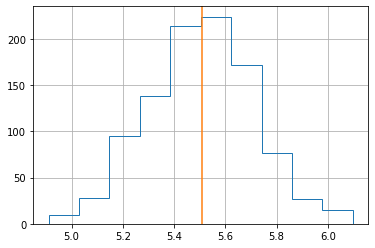

In [10]:
bootstrap.meangrade.hist(histtype='step')
plt.axvline(pop.grade.mean(),color='C1')

In [11]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.110104177132354, 5.912118836543843)

> Bootstrap approximated 95% confidence interval for the mean grade

In [12]:
scipy.stats.percentileofscore(pop.grade,5)

43.0

In [13]:
bootstrap = pd.DataFrame({'passing':[scipy.stats.percentileofscore(pop.sample(100,replace=True).grade,5) for i in range(1000)]})

<AxesSubplot:>

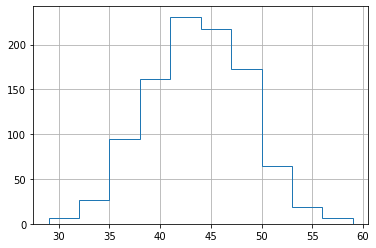

In [14]:
bootstrap.passing.hist(histtype='step')

In [15]:
bootstrap.passing.quantile(0.025), bootstrap.passing.quantile(0.975)

(34.0, 53.0)

> Bootstrap approximated 95% confidence interval for a passing grade is between 33% and 53%